In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Crop_Pred.csv to Crop_Pred.csv
User uploaded file "Crop_Pred.csv" with length 176059 bytes


   temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice
1    21.770462  80.319644  7.038096  226.655537  rice
2    23.004459  82.320763  7.840207  263.964248  rice
3    26.491096  80.158363  6.980401  242.864034  rice
4    20.130175  81.604873  7.628473  262.717340  rice

coefficient of determination R^2 of the prediction.:  1.0

Mean squared error: 0.01

Test Variance score: 0.79

The accuracy of this model is:  90.43010752688173

For input conditions of temperature, humidity, pH, rainfall : 
[[82.13873825, 22.17499963, 5.410441476, 117.46622584]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0.]]
The predicted crop is grapes



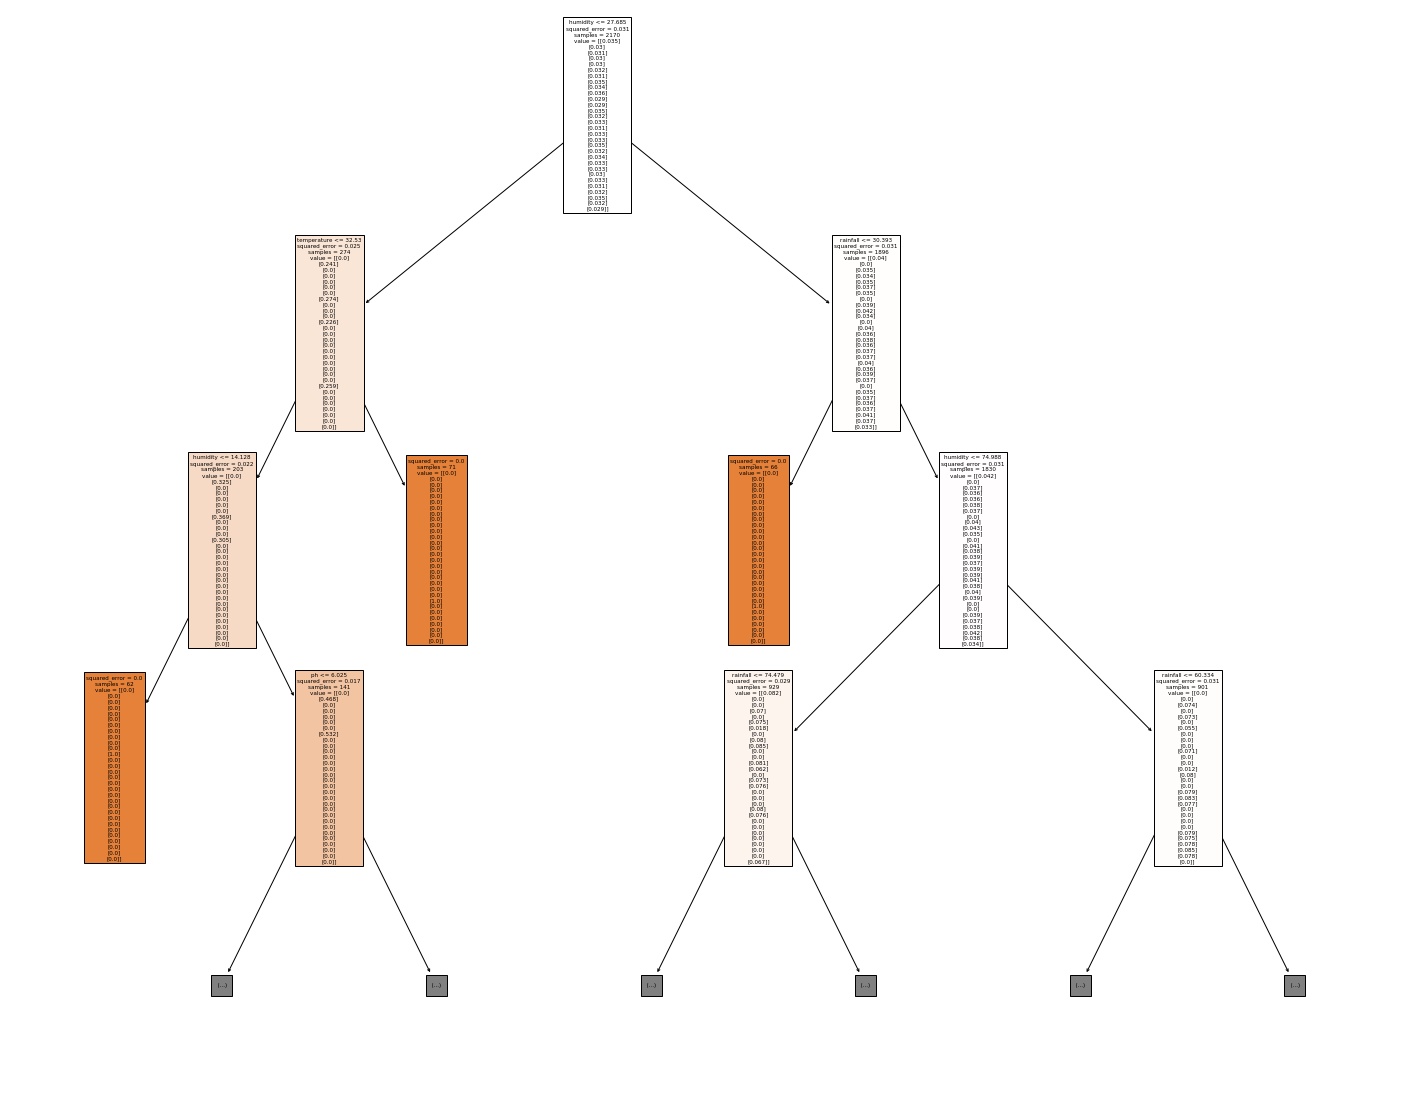

In [ ]:
#importing the required libraries
import pandas as pd   #data manipulation and analysis
import numpy as np   #maths calc
from matplotlib import pyplot as plt # tree plot
from sklearn import tree   #dec tree
from sklearn.model_selection import train_test_split   # for splitting the data

#Reading the csv file
data=pd.read_csv('Crop_Pred.csv')
print(data.head())
print()
features = list(data.columns[:4])
#print("* features:", features, sep="\n")

my_dummy= pd.get_dummies(data.label).iloc[: , 1:]
data= pd.concat([data,my_dummy],axis=1)
data.drop('label', axis=1,inplace=True)
#print('The data present in one row of the dataset is')
#print(data.head(1))
#print()
train=data.iloc[:, 0:4].values
test=data.iloc[: ,4:].values
#print(train)
#print(test)
#Dividing the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3,random_state=9)

#print before transform
#print(X_train)
#print(X_train.min(),X_train.max())
#print(X_train.getfield()
#print(X_train[0])
#print(y_train)

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

#print after transform
#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

#Importing Decision Tree classifier
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
#clf=DecisionTreeRegressor(criterion='entropy')

#Fitting the classifier into training set
clf.fit(X_train,y_train)  #creating the ml model,, mean standard dev calcs
#print('After fitting in tree : X_train : ',X_train)
#print()

#text_representation = tree.export_text(clf)
#print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=features,max_depth = 3,filled=True)
#_ = tree.plot_tree(clf,max_depth = 2,filled=True)
#_ = tree.plot_tree(clf,feature_names=features,filled=True)

#print(y_train)
pred=clf.predict(X_test)
#print(pred)
#print(X_test)

x = clf.get_n_leaves()
#print('Number of leaves in dec tree : ',x)
#print()
depth = clf.get_depth()
#print('Depth of dec tree : ',depth)
#print()

from sklearn.metrics import mean_squared_error, r2_score
model_score = clf.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',model_score)
print()

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, pred))
print()
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, pred))
print()

from sklearn.metrics import accuracy_score
# Finding the accuracy of the model
a=accuracy_score(y_test,pred)
print("The accuracy of this model is: ", a*100)
print()

# Field inputs evaluation for Crop Prediction
ah=82.13873825
atemp=22.17499963
pH=5.410441476
rain=117.46622584

predictcrop=[[ah,atemp,pH,rain]]
print("For input conditions of temperature, humidity, pH, rainfall : ")
print(predictcrop)
print()

# Putting the names of crop in a single list
crops=['wheat','mungbean','Tea','millet','maize','lentil','jute','coffee','cotton','ground nut','peas','rubber','sugarcane','tobacco','kidney beans','moth beans','coconut','blackgram','adzuki beans','pigeon peas','chick peas','banana','grapes','apple','mango','muskmelon','orange','papaya','watermelon','pomegranate']
cr='rice'

#Predicting the crop
predictions = clf.predict(predictcrop)
print(predictions)
#print()
d_path = clf.decision_path(predictcrop)
#print('Decision path : ',d_path)
#print()

count=0
for i in range(0,30):
    if(predictions[0][i]==1):
        c=crops[i]
        count=count+1
        break;
    i=i+1
if(count==0):
    print('The predicted crop is %s'%cr)
    print()
else:
    print('The predicted crop is %s'%c)
    print()
